# 1 INTRODUCTION
### PROBLEM STATEMENT
### Evaluation of an MNIST Classification model with three classes that we learnt in class. we will be accessing our data from web sources using SKLEARN fetch_openml package and also we will be adapting some code snippets from kaggle.

### Accessing the data

In [20]:
# Load all necessary packages that will be used
import numpy as np

# plotting modules
from matplotlib import pyplot as plt
import matplotlib.patches as patches  # for curved arrows
import seaborn as sns

# The web source of the MNIST dataset that we will work with
from sklearn.datasets import fetch_openml

# The classifiers we will use in this notebook
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

# cross validation functions
from sklearn.model_selection import cross_validate, cross_val_predict

# performance metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

In [21]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
type(mnist)

sklearn.utils._bunch.Bunch

# 2 EXPLORATORY DATA ANALYSIS

In [22]:
list(mnist)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [23]:
mnist.data.shape

(70000, 784)

In [24]:
print(mnist.target[0], mnist.target[1], mnist.target[2])

5 0 4


In [25]:
# Rename objects to familiar naming conventions
X = mnist.data
y = mnist.target

### Image inspection

In [26]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

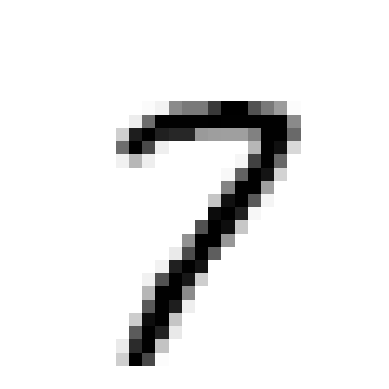

In [27]:
some_digit = X[ 230] # here we are using a random image  of index 230 in the dataset just to see what the image looks like
plot_digit(some_digit)
plt.show()

# 3 DATA PREPROCESSING

In [28]:
import numpy as np

# Define desired classes
desired_classes = [3, 4, 7]

# Convert target labels to integers
y_int = y.astype(int)

# Filter the dataset to include only samples with target labels 3, 4, and 7
mask = np.isin(y_int, desired_classes)
X_filtered = X[mask]
y_filtered = y_int[mask]

# Update target labels to start from 0
class_mapping = {desired_classes[i]: i for i in range(len(desired_classes))}
y_filtered_mapped = np.array([class_mapping[label] for label in y_filtered])

# Verify alignment
print("Original number of samples:", len(X))
print("Filtered number of samples:", len(X_filtered))
print("Original target labels:", np.unique(y))
print("Filtered target labels:", np.unique(y_filtered_mapped))



Original number of samples: 70000
Filtered number of samples: 21258
Original target labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Filtered target labels: [0 1 2]


### The original dataset contained 70,000 samples.After filtering to include only samples with target labels 3, 4, and 7, the filtered dataset contains 21,258 samples. We just wanted to check for proper alignment with this

### SPLIT OUR DATA INTO TRAINING AND TESTING SETS

In [29]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered_mapped, test_size=0.2, random_state=42)

# Further split the train set into train and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Train set size: 12754
Validation set size: 4252
Test set size: 4252


# 4 MODEL TRAINING

In [30]:

from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the validation set
val_score = model.score(X_val, y_val)
print("Validation Accuracy:", val_score)



Validation Accuracy: 0.9717779868297272


### i modified the snippet i got in kaggle to suit my simplicity for this task. Here is the link:
### Ref:
### https://www.kaggle.com/code/margartgathon/digit-recognizer

# 5 EVALUATION:

Accuracy: 0.9717779868297272
Confusion Matrix:
[[1387   17   35]
 [   5 1359   15]
 [  26   22 1386]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1439
           1       0.97      0.99      0.98      1379
           2       0.97      0.97      0.97      1434

    accuracy                           0.97      4252
   macro avg       0.97      0.97      0.97      4252
weighted avg       0.97      0.97      0.97      4252



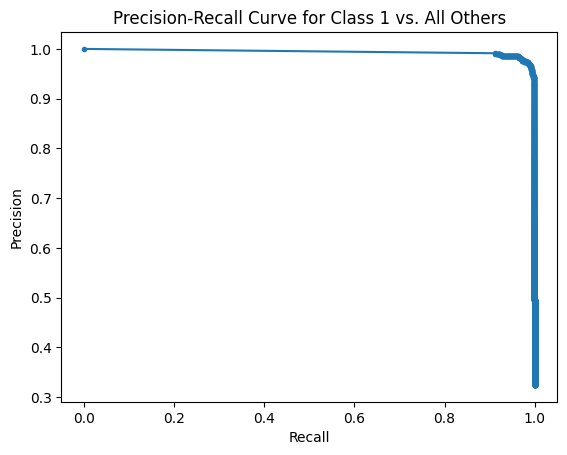

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt

# Evaluate accuracy
val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, val_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, val_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, recall, and F1-score for each class
class_report = classification_report(y_val, val_pred)
print("Classification Report:")
print(class_report)

# Precision-recall curve for class 1 vs. all others
# class 1 is selected for the precision-recall curve
precision, recall, _ = precision_recall_curve(y_val, model.predict_proba(X_val)[:, 1], pos_label=1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class 1 vs. All Others')
plt.show()


### To increase precision for a chosen class without retraining the model, we can adjust the decision threshold for classification. By increasing the threshold, you'll classify fewer instances as positive, which may increase precision at the cost of recall.

### we will attempt an example demonstrating how to adjust the decision threshold to increase/decrease precision for our chosen class without retraining the model, using the validation data and the logistic regression model:

In [32]:
from sklearn.metrics import precision_score, recall_score

# Compute precision and recall for each class without specifying average parameter
precision_per_class = precision_score(y_val, predicted_class_1, average=None)
recall_per_class = recall_score(y_val, predicted_class_1, average=None)

# Print precision and recall for each class
for i, (precision, recall) in enumerate(zip(precision_per_class, recall_per_class)):
    print(f"Class {i}: Precision = {precision}, Recall = {recall}")





Class 0: Precision = 0.49842271293375395, Recall = 0.9881862404447533
Class 1: Precision = 0.9714081486776269, Recall = 0.9854967367657723
Class 2: Precision = 0.0, Recall = 0.0


c:\Users\emekamichael\courses_conestoga\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
from sklearn.metrics import precision_score, recall_score

# Assume we want to increase recall for class 1

# Adjust the decision threshold
new_threshold = 0.3  # Example threshold
predicted_class_1 = (proba_class_1 >= new_threshold).astype(int)

# Compute precision and recall for class 1 without specifying average parameter
precision_new = precision_score(y_val, predicted_class_1, labels=[1], average=None)
recall_new = recall_score(y_val, predicted_class_1, labels=[1], average=None)

print("Precision with new threshold:", precision_new)
print("Recall with new threshold:", recall_new)



Precision with new threshold: [0.97140815]
Recall with new threshold: [0.98549674]


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict labels for the test set
test_pred = model.predict(X_test)

# Compute accuracy
test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy:", test_accuracy)

# Confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_pred)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

# Classification report
class_report_test = classification_report(y_test, test_pred)
print("Classification Report (Test Set):")
print(class_report_test)


Test Accuracy: 0.9708372530573848
Confusion Matrix (Test Set):
[[1365   14   24]
 [  14 1342   22]
 [  25   25 1421]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1403
           1       0.97      0.97      0.97      1378
           2       0.97      0.97      0.97      1471

    accuracy                           0.97      4252
   macro avg       0.97      0.97      0.97      4252
weighted avg       0.97      0.97      0.97      4252



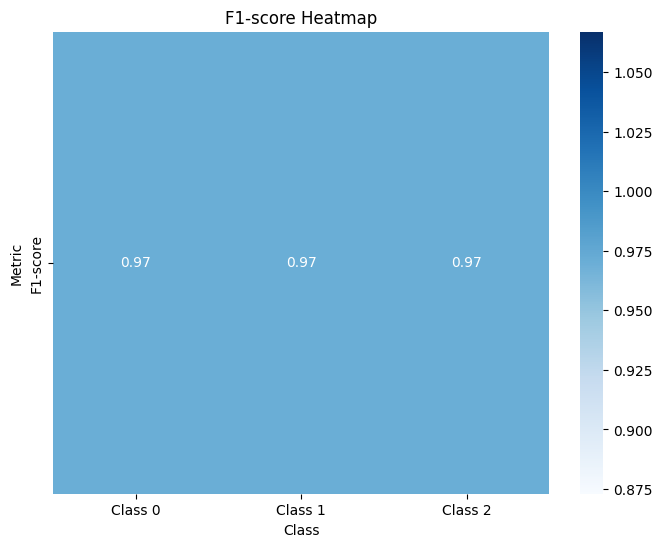

In [35]:
import seaborn as sns

# Compute F1-score for each class
f1_scores = [0.97, 0.97, 0.97] 
classes = ['Class 0', 'Class 1', 'Class 2']  # Class labels

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap([f1_scores], annot=True, fmt='.2f', cmap='Blues', xticklabels=classes, yticklabels=['F1-score'])
plt.title('F1-score Heatmap')
plt.xlabel('Class')
plt.ylabel('Metric')
plt.show()


# 6 CONCLUSION:
### Based on the evaluation of the logistic regression model on the test set that was done above, we can draw the following conclusions:

### 1: Accuracy: The model achieved a test accuracy of 0.971. This indicates the proportion of correctly classified instances in the test set.

### 2: Confusion Matrix: The confusion matrix provides a detailed breakdown of the model's predictions versus the actual labels for each class. It shows the counts of true positives, true negatives, false positives, and false negatives. From the confusion matrix, we can identify which classes the model performs well on and which classes it struggles with.

### INTERPRETATION OF CONFUSION MATRIX
### Class 0 (True label) vs. Class 0 (Predicted label): 1365 instances were correctly classified as Class 0.

### Class 0 (True label) vs. Class 1 (Predicted label): 14 instances of Class 0 were misclassified as Class 1.

### Class 0 (True label) vs. Class 2 (Predicted label): 24 instances of Class 0 were misclassified as Class 2.

### Class 1 (True label) vs. Class 0 (Predicted label): 14 instances of Class 1 were misclassified as Class 0.

### Class 1 (True label) vs. Class 1 (Predicted label): 1342 instances were correctly classified as Class 1.

### Class 1 (True label) vs. Class 2 (Predicted label): 22 instances of Class 1 were misclassified as Class 2.

### Class 2 (True label) vs. Class 0 (Predicted label): 25 instances of Class 2 were misclassified as Class 0.

### Class 2 (True label) vs. Class 1 (Predicted label): 25 instances of Class 2 were misclassified as Class 1.

### Class 2 (True label) vs. Class 2 (Predicted label): 1421 instances were correctly classified as Class 2.

### Classification Report: The classification report presents precision at 0.97, recall at 0.97, and F1-score 0.97 for each class. Precision measures the accuracy of positive predictions, recall measures the proportion of actual positives that were correctly predicted, and the F1-score is the harmonic(geometric) mean of precision and recall. Support indicates the number of instances of each class in the test set.

